# Give an overall summary of your performance from HW2 on the dataset. Do you see any areas for improvement?

After redoing my HW2, I have learned that I first need to define x and y, take out 0s, and then place all of my modeling after I have done these steps. In HW2, my code was also all over the place, so I made an effort in HW3 to only use code I need and put it in the right order. In terms of areas for improvement, my performance scores are low so I could have picked better variables to define x and y.

# Run k-Means and PCA on the dataset and describe your results.Use the cluster outputs you got from running k-means and PCA as a new feature. Rerun your "worst" and "best" model from HW2, including this new feature along with your old features. Describe your results.

I ran k-Means and visualized my results. Blood pressure and diabetes pedigree function had a larger correlation than visualizing diabetes pedigree function and class variable (0 or 1)

When I ran PCA on the dataset, my performance was very low (11% accurate). 


# Give your conclusions on the use of k-Means and PCA on the Diabetes dataset.
These methods are great for analyzing large datasets using unsuprivised learning. In my opinion, k-Means was a better prediction indicator on the Diabetes dataset. It was easy to visualize, and gave a good indication of the correlation between the variables in the dataset.

In [189]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
from sklearn import datasets
from sklearn.grid_search import GridSearchCV
from sklearn.cross_validation import train_test_split, ShuffleSplit
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from sklearn.metrics import silhouette_score
from sklearn.svm import SVC
%matplotlib inline

In [190]:
np.random.seed(7)

In [191]:
#load datsaset
names = ['preg','plasmaglu', 'bloodpressure','sknthckness', 'insulin', 'bmi', 'diabetes', 'age', 'class']
df = pd.read_csv('https://archive.ics.uci.edu/ml/machine-learning-databases/pima-indians-diabetes/pima-indians-diabetes.data', names=names)

In [192]:
#get rid of 0s
for feature in ['plasmaglu','bloodpressure','sknthckness','insulin','bmi']:
   df.loc[:,feature].replace(to_replace=0, value=np.nan, inplace=True)
for f in ['plasmaglu','bmi','bloodpressure','insulin','sknthckness']:
  med = df[f].median()
  df[f].fillna(med, inplace=True)

In [193]:
df_labels = df['diabetes']
df_X = df.drop('diabetes', axis=1)

In [194]:
y, X = df['bloodpressure'], df.drop('bloodpressure', axis=1)

In [195]:
from sklearn.preprocessing import scale

In [196]:
#Setup the experiment with test/train and cv
X_train, X_test, y_train, y_test = train_test_split(X, y, 
                                                    test_size=0.2, random_state=7)

In [197]:
cv = ShuffleSplit(X_train.shape[0], n_iter=5, test_size=0.2, random_state=0)

In [198]:
from sklearn.cross_validation import train_test_split
from sklearn.preprocessing import StandardScaler

# experiment w dropping low importance variables
df = df.drop(['preg', 'age'], axis=1)

# standardization: bring all of our features onto the same scale
stdsc = StandardScaler()

pima_neither = df.drop(['plasmaglu', 'insulin'], axis=1)
# the dropped rows may bias the means - use means from this particular dataset 
pima_neither = pima_neither.fillna(pima_neither.mean())
X_neither_std = stdsc.fit_transform(pima_neither.drop('diabetes', axis=1))
X_train_neither, X_test_neither, y_train_neither, y_test_neither = train_test_split(
    X_neither_std, pima_neither['diabetes'],
    test_size=0.2, random_state=7)

In [199]:
n_digits = len(np.unique(y))

In [200]:
#kmeans using n_digits for number of clusters
km = KMeans(n_clusters=n_digits, n_init=10)
km.fit(X_train)

KMeans(copy_x=True, init='k-means++', max_iter=300, n_clusters=46, n_init=10,
    n_jobs=1, precompute_distances='auto', random_state=None, tol=0.0001,
    verbose=0)

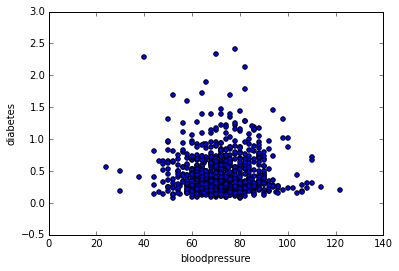

In [201]:
#visualize best model
df.plot(kind='scatter', x='bloodpressure', y='diabetes');

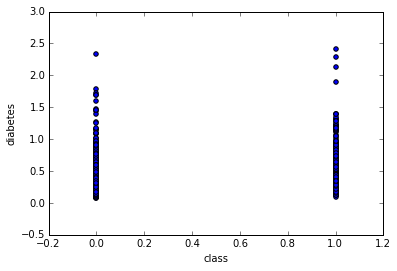

In [202]:
#visualize worst model
df.plot(kind='scatter', x='class', y='diabetes');

In [203]:
#Create PCA
X_train_only = X_train.iloc[:, 0:64]
X_test_only = X_test.iloc[:, 0:64]

In [204]:
pca.components_.shape

(1, 8)

In [205]:
pca = PCA(n_components=0.8, whiten=True).fit(X_train)
pca.fit(X_train_only)

PCA(copy=True, n_components=0.8, whiten=True)

In [206]:
svm_pca = SVC(C=0.001, degree=3, gamma=1.111999, kernel='poly')

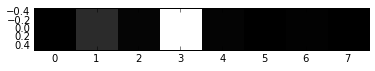

In [207]:
plt.imshow(pca.components_[0].reshape(1,8), cmap=plt.cm.gray_r, interpolation='nearest')

In [208]:
%timeit svm_pca.fit(pca.transform(X_train_only), y_train)

10 loops, best of 3: 24.3 ms per loop


In [209]:
svm_pca.score(pca.transform(X_test_only), y_test)

0.11038961038961038